In [109]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import datetime as dt

import warnings
warnings.filterwarnings("ignore")


In [67]:
# Load the dataset
df = pd.read_csv(r"C:\sia\Online Retail.csv", encoding='latin-1')

In [68]:
# Handle missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [69]:
# Remove rows with missing values
df = df.dropna()

In [70]:
# Remove duplicates
print("\nDuplicate entries:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate entries: 5225


In [71]:
# Address inconsistencies or errors
# For example, converting InvoiceDate to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [72]:
# Data transformation
# Convert categorical variables into numerical representations
df["CountryCode"] = df["Country"].astype('category').cat.codes
df["InvoiceYearMonth"] = df["InvoiceDate"].dt.to_period('M')
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Exclude canceled orders
df = df[df["InvoiceNo"].str.startswith("C") == False]

In [73]:
# Print the updated dataframe
print("\nUpdated dataframe:")
display(df.head())


Updated dataframe:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CountryCode,InvoiceYearMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,35,2010-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,35,2010-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,35,2010-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,35,2010-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,35,2010-01,20.34


# EDA: 

### Shape of data

In [74]:
#Shape of data:
df.shape

(401604, 11)

### Structure of Data

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         401604 non-null  object        
 1   StockCode         401604 non-null  object        
 2   Description       401604 non-null  object        
 3   Quantity          401604 non-null  int64         
 4   InvoiceDate       401604 non-null  datetime64[ns]
 5   UnitPrice         401604 non-null  float64       
 6   CustomerID        401604 non-null  float64       
 7   Country           401604 non-null  object        
 8   CountryCode       401604 non-null  int8          
 9   InvoiceYearMonth  401604 non-null  period[M]     
 10  TotalPrice        401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), int8(1), object(4), period[M](1)
memory usage: 34.1+ MB


### Descriptive Statistics

In [76]:
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,Quantity,UnitPrice,CustomerID,CountryCode,TotalPrice
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,32.803080,20.613638
std,250.283037,69.764035,1714.006089,6.772753,430.352218
min,-80995.000000,0.000000,12346.000000,0.000000,-168469.600000
25%,2.000000,1.250000,13939.000000,35.000000,4.250000
50%,5.000000,1.950000,15145.000000,35.000000,11.700000
75%,12.000000,3.750000,16784.000000,35.000000,19.800000
max,80995.000000,38970.000000,18287.000000,36.000000,168469.600000


### Total Number of Products, Transactions, and Customers

In [77]:
# Total number of products, transactions, and customers
num_products = df['StockCode'].nunique()
num_transactions = df['InvoiceNo'].nunique()
num_customers = df['CustomerID'].nunique()

print("Total Number of Products:", num_products)
print("Total Number of Transactions:", num_transactions)
print("Total Number of Customers:", num_customers)

Total Number of Products: 3684
Total Number of Transactions: 22190
Total Number of Customers: 4372


Text(0.5, 1.0, 'Histogram of Purchase Frequency')

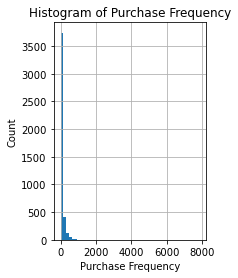

In [78]:
# Histogram of purchase frequency
plt.subplot(1, 2, 1)
df['CustomerID'].value_counts().hist(bins=50)
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.title('Histogram of Purchase Frequency')

### Analysis of Order Types

In [79]:
# Remove leading and trailing spaces from "InvoiceNo" column
df['InvoiceNo'] = df['InvoiceNo'].str.strip()

# Count canceled orders
cancelled_orders = df[df['InvoiceNo'].str.contains('Cancelled')].shape[0]

# Count postage orders
postage_orders = df[df['StockCode'] == 'POST'].shape[0]

# Count discount orders
discount_orders = df[df['Description'] == 'DISCOUNT'].shape[0]

print("Number of Canceled Orders:", cancelled_orders)
print("Number of Postage Orders:", postage_orders)
print("Number of Discount Orders:", discount_orders)

Number of Canceled Orders: 8872
Number of Postage Orders: 1196
Number of Discount Orders: 77


### Cohort analysis
Cohort analysis: Time cohorts

>We group customers by their purchase behavior over time, specifically by their monthly purchase count using the "InvoiceNo" column.

Cohort analysis: Behavior cohorts

>We determine the customer's cohort based on the month of their first purchase and calculate the cohort index based on the number of months between subsequent purchases.

Cohort analysis: Size cohorts

>We calculate the cohort size by counting the number of unique customers in each cohort.

In [101]:
cohort_data = df[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country']]

In [80]:
# Cohort analysis: Time cohorts
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period('M')
cohort_data = df.groupby(["CustomerID", "InvoiceMonth"]).agg({"InvoiceNo": "nunique"}).reset_index()
cohort_data.rename(columns={"InvoiceNo": "TotalPurchases"}, inplace=True)

# Cohort analysis: Behavior cohorts
cohort_data["CohortMonth"] = cohort_data.groupby("CustomerID")["InvoiceMonth"].transform("min")
cohort_data["CohortIndex"] = (cohort_data["InvoiceMonth"].dt.year - cohort_data["CohortMonth"].dt.year) * 12 + (cohort_data["InvoiceMonth"].dt.month - cohort_data["CohortMonth"].dt.month) + 1

# Cohort analysis: Size cohorts
cohort_sizes = cohort_data.groupby(["CohortMonth", "CohortIndex"]).agg({"CustomerID": "nunique"}).reset_index()
cohort_sizes.rename(columns={"CustomerID": "CohortSize"}, inplace=True)


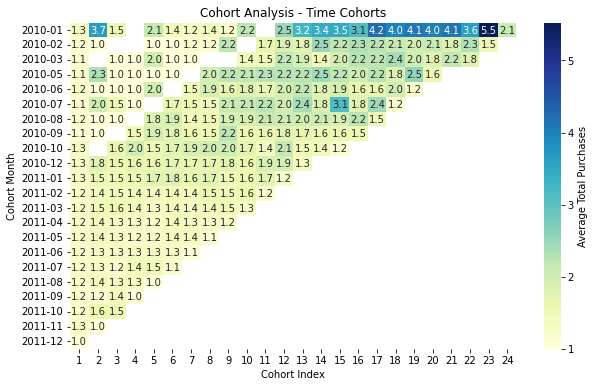

In [81]:
# Cohort analysis
# Plotting time cohorts

cohort_pivot = cohort_data.pivot_table(index="CohortMonth", columns="CohortIndex", values="TotalPurchases", aggfunc="mean")

plt.figure(figsize=(10, 6))
plt.title('Cohort Analysis - Time Cohorts')
sns.heatmap(data=cohort_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Average Total Purchases'})
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()


### Customer segmentation insights

>We calculate the total spending and purchase frequency for each customer.

In [82]:
# Customer segmentation insights: Total spending vs. purchase frequency
segmentation_data = df.groupby("CustomerID").agg({"TotalPrice": "sum", "InvoiceNo": "nunique"}).reset_index()
segmentation_data

,CustomerID,TotalPrice,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1
...,...,...,...
4367,18280.0,180.60,1
4368,18281.0,80.82,1
4369,18282.0,176.60,3
4370,18283.0,2045.53,16


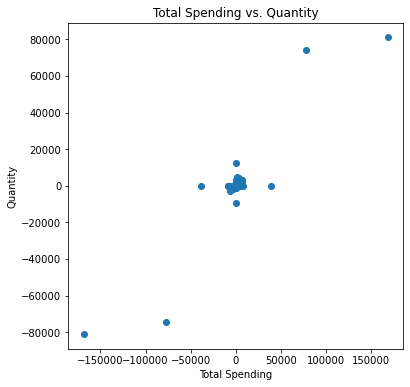

In [83]:
# Customer segmentation insights
plt.figure(figsize=(6, 6))
plt.scatter(df['TotalPrice'], df['Quantity'])
plt.xlabel('Total Spending')
plt.ylabel('Quantity')
plt.title('Total Spending vs. Quantity')
plt.show()

### Identify outliers and anomalies

>We use boxplots to identify outliers and anomalies in the total spending and purchase frequency variables.

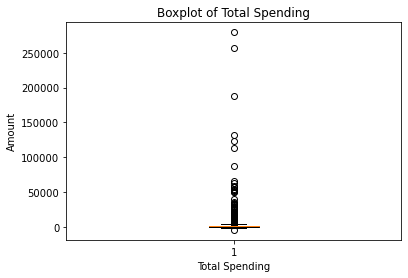

In [84]:
# Identify outliers and anomalies: Total spending
plt.boxplot(segmentation_data["TotalPrice"])
plt.xlabel("Total Spending")
plt.ylabel("Amount")
plt.title("Boxplot of Total Spending")
plt.show()

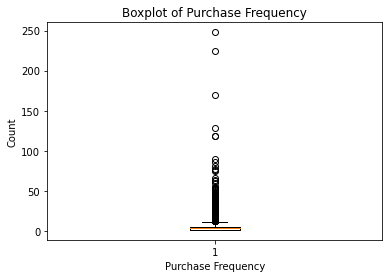

In [85]:
# Identify outliers and anomalies: Purchase frequency
plt.boxplot(segmentation_data["InvoiceNo"])
plt.xlabel("Purchase Frequency")
plt.ylabel("Count")
plt.title("Boxplot of Purchase Frequency")
plt.show()

### Customer Demographics

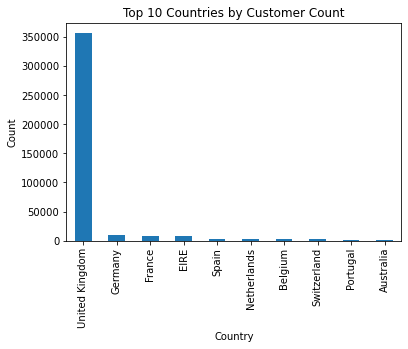

In [86]:
# Explore customer demographics
plt.figure(figsize=(6, 4))
df['Country'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Customer Count')
plt.show()

# Feature selection & Feature Engineering

### Feature selection

In [87]:
# Feature Selection
selected_features = ['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']
selected_data = df[selected_features]

### Feature Engineering

In [88]:
# Feature Engineering
# Calculate total spending per customer
total_spending = selected_data.groupby('CustomerID')['Quantity', 'UnitPrice'].prod().sum(axis=1)
selected_data['TotalSpending'] = total_spending

# Fill missing values with 0
selected_data['TotalSpending'].fillna(0, inplace=True)

# Calculate purchase frequency per customer
purchase_frequency = selected_data.groupby('CustomerID')['InvoiceNo'].nunique()
selected_data['PurchaseFrequency'] = purchase_frequency

#### Average Basket Size

In [89]:
# Calculate average basket size overall
average_basket_size = selected_data['Quantity'].mean()
print("Average Basket Size: ", average_basket_size)

Average Basket Size:  12.183272576966365


#### Is Buyer Frequent or Occasional?

In [90]:
# Create a new variable indicating whether a customer is a frequent buyer or occasional shopper
selected_data['FrequentBuyer'] = selected_data['PurchaseFrequency'].apply(lambda x: 'Frequent' if x >= 5 else 'Occasional')

# Count the types of buyer
buyer_counts = selected_data['FrequentBuyer'].value_counts()
print(buyer_counts)


Occasional    400793
Frequent         811
Name: FrequentBuyer, dtype: int64


### RFM Analysis

In [124]:
import pandas as pd
from dateutil.relativedelta import relativedelta

# Convert InvoiceDate to date format
all_dates = (pd.to_datetime(cohort_data['InvoiceDate'])).apply(lambda x: x.date())

# Check the date range of the data
date_range = (all_dates.max() - all_dates.min()).days
print("Date range: {} days".format(date_range))

# Start and end dates
#print('Start date: {}'.format(all_dates.min()))
#print('End date: {}'.format(all_dates.max()))

# Calculate the start date for RFM analysis (12 months ago from the max date)
start_date = all_dates.max() - relativedelta(months=12, days=-1)
print('Start date: {}'.format(start_date))
print('End date: {}'.format(all_dates.max()))

cohort_data['TotalSum'] = cohort_data['Quantity']*cohort_data['UnitPrice']
cohort_data.head() 
snapshot_date = max(data_rfm.InvoiceDate) + dt.timedelta(days=1)
print('Snapshot date: {}'.format(snapshot_date.date()))

# Filter the data based on the start date
data_rfm = cohort_data[cohort_data['InvoiceDate'] >= pd.to_datetime(start_date)]
data_rfm.reset_index(drop=True, inplace=True)

# Aggregate data on a customer level
data = data_rfm.groupby(['CustomerID'], as_index=False).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSum': 'MonetaryValue'
})

# Assign R, F, and M quartiles
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(data['Recency'], 4, labels=r_labels)
data = data.assign(R=r_quartiles.values)

f_labels = range(1, 5)
m_labels = range(1, 5)
f_quartiles = pd.qcut(data['Frequency'], 4, labels=f_labels)
m_quartiles = pd.qcut(data['MonetaryValue'], 4, labels=m_labels)
data = data.assign(F=f_quartiles.values)
data = data.assign(M=m_quartiles.values)

data.head()


Date range: 697 days
Start date: 2010-12-11
End date: 2011-12-10
Snapshot date: 2011-12-11


,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,12346.0,327,2,0.00,1,1,1
1,12347.0,41,151,3598.21,3,4,4
2,12348.0,77,31,1797.24,2,2,4
3,12349.0,20,73,1757.55,4,3,4
4,12350.0,312,17,334.40,1,1,2


#### General segmentation
This code assigns the "Low" category to customers who do not meet the criteria for the "Middle" or "Top" segments. Customers with RFM scores between 5 and 9 (inclusive) for Recency, Frequency, and MonetaryValue are categorized as "Middle." Customers with RFM scores greater than or equal to 9 for all three dimensions are categorized as "Top."

In [120]:
# Create a new column 'General_Segment' to assign segment categories
data['General_Segment'] = 'Low'

# Assign 'Middle' segment category to customers with RFM scores between 5 and 9
data.loc[(data['R'].astype(int) >= 5) & (data['R'].astype(int) <= 9) &
         (data['F'].astype(int) >= 5) & (data['F'].astype(int) <= 9) &
         (data['M'].astype(int) >= 5) & (data['M'].astype(int) <= 9),
         'General_Segment'] = 'Middle'

# Assign 'Top' segment category to customers with RFM scores greater than or equal to 9
data.loc[(data['R'].astype(int) >= 9) & (data['F'].astype(int) >= 9) &
         (data['M'].astype(int) >= 9), 'General_Segment'] = 'Top'

def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

data['RFM_Segment'] = data.apply(join_rfm, axis=1)
data['RFM_Score'] = data[['R','F','M']].sum(axis=1)
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,General_Segment,RFM_Segment,RFM_Score
0,12346.0,327,2,0.00,1,1,1,Low,111,3
1,12347.0,41,151,3598.21,3,4,4,Low,344,11
2,12348.0,77,31,1797.24,2,2,4,Low,224,8
3,12349.0,20,73,1757.55,4,3,4,Low,434,11
4,12350.0,312,17,334.40,1,1,2,Low,112,4


In [121]:
data.groupby('RFM_Score').agg({'Recency': 'mean',
                                   'Frequency': 'mean',
                                   'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           244.8       7.7         107.4   377
4           171.8      13.9         214.8   363
5           151.1      21.2         332.2   523
6            99.0      27.8         473.4   490
7            90.2      40.5         708.8   416
8            63.8      56.0         977.9   451
9            47.3      73.3        1345.2   405
10           38.3     121.5        1893.4   440
11           24.7     184.8        4161.0   407
12            9.9     364.3        8620.0   419

In [122]:
def create_segment(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Middle'
    else:
        return 'Low'
    
data['General_Segment'] = data.apply(create_segment, axis=1)
data.groupby('General_Segment').agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               209.0      10.7         160.1   740
Middle            103.1      35.5         607.2  1880
Top                30.1     186.1        3999.5  1671

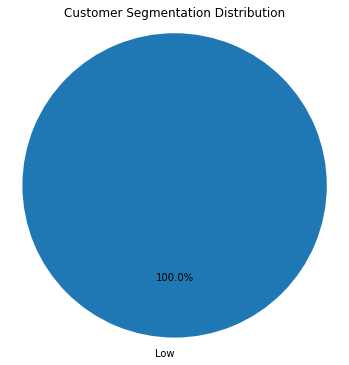

In [113]:
# Count the number of customers in each segment
segment_counts = data['General_Segment'].value_counts()

# Create a pie chart to visualize the segment distribution
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segmentation Distribution')
plt.axis('equal')
plt.show()

### Kmeans Evaluation

In [126]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)  # X is the feature matrix containing Recency, Frequency, and MonetaryValue

# Calculate within-cluster variance
within_cluster_variance = kmeans.inertia_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)

print("Within-cluster variance:", within_cluster_variance)
print("Silhouette score:", silhouette_avg)


Within-cluster variance: 972.576324096754
Silhouette score: 0.6819023379998185
